Name: Fadilah Nur Imani | Username: fadilahnurimani | Email: fadilahnurimani@gmail.com

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# import datasets
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-09-04 22:41:40--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.26MB/s    in 66s     

2020-09-04 22:42:46 (4.68 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# extract zip file
import zipfile
import os
local_zip = '/tmp/rockpaperscissors.zip'
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
zip_extract = zipfile.ZipFile(local_zip, 'r')
zip_extract.extractall('/tmp')
zip_extract.close()

In [4]:
# check rockpaperscissors
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'scissors', 'paper', 'rps-cv-images', 'rock']

In [5]:
# check rps-cv-image
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'scissors', 'paper', 'rock']

In [6]:
# image augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.4
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [9]:
# count loss function and optimizer
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']               
)

In [10]:
# train data
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2
)

Epoch 1/20
25/25 - 24s - loss: 1.0321 - accuracy: 0.4437 - val_loss: 0.7671 - val_accuracy: 0.6687
Epoch 2/20
25/25 - 23s - loss: 0.6176 - accuracy: 0.7662 - val_loss: 0.4892 - val_accuracy: 0.7437
Epoch 3/20
25/25 - 24s - loss: 0.2838 - accuracy: 0.9075 - val_loss: 0.2787 - val_accuracy: 0.9125
Epoch 4/20
25/25 - 23s - loss: 0.2245 - accuracy: 0.9208 - val_loss: 0.2451 - val_accuracy: 0.9312
Epoch 5/20
25/25 - 27s - loss: 0.1690 - accuracy: 0.9438 - val_loss: 0.0677 - val_accuracy: 0.9625
Epoch 6/20
25/25 - 23s - loss: 0.1349 - accuracy: 0.9468 - val_loss: 0.2882 - val_accuracy: 0.9187
Epoch 7/20
25/25 - 24s - loss: 0.1717 - accuracy: 0.9468 - val_loss: 0.0817 - val_accuracy: 0.9688
Epoch 8/20
25/25 - 24s - loss: 0.1366 - accuracy: 0.9563 - val_loss: 0.1319 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 23s - loss: 0.0794 - accuracy: 0.9792 - val_loss: 0.0579 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 24s - loss: 0.0456 - accuracy: 0.9825 - val_loss: 0.1785 - val_accuracy: 0.9625
Epoch 11/

Saving 20200905_060027.jpg to 20200905_060027.jpg
20200905_060027.jpg
scissors


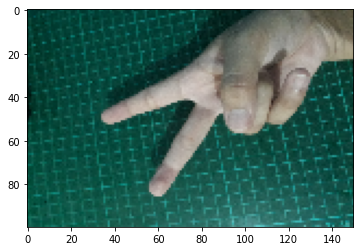

In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = fn
  img_source = image.load_img(path, target_size = (100, 150))
  imgplot = plt.imshow(img_source)
  x = image.img_to_array(img_source)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  if classes[0, 0] == 1:
    print('rock')
  elif classes[0, 1] == 1:
    print('paper')
  elif classes[0, 2] == 1:
    print('scissors')